# Minimal SHAP example - Classification Problem - Titanic Dataset 

In [101]:
import xgboost
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import machine learning methods
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Import shap for shapley values
import shap

# JavaScript Important for the interactive charts later on
shap.initjs()

In [102]:
download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./datasets/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_data.csv', index=False)

data = pd.read_csv('datasets/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

# Use `survived` field as y, and drop for X
y = data['Survived'] # y = 'survived' column from 'data'
X = data.drop('Survived', axis=1) # X = all 'data' except the 'survived' column

# Drop PassengerId
X.drop('PassengerId',axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Predict probabilities of survival
y_prob_train = model.predict_proba(X_train)
y_prob_test = model.predict_proba(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train:.2%}')
print (f'Accuracy of predicting test data = {accuracy_test:.2%}')

Accuracy of predicting training data = 97.31%
Accuracy of predicting test data = 80.72%


In [103]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap_values

.values =
array([[-0.41472028, -0.82758431,  0.08631781, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34368675,  0.01027041,  0.20749824, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49629094, -0.24858944, -0.07239207, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.45505765, -0.95988004,  0.14636154, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38846514, -0.87314281,  0.06420199, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51810456, -1.0059387 ,  0.18350499, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([-0.81725838, -0.81725838, -0.81725838, -0.81725838, -0.81725838,
       -0.81725838, -0.81725838, -0.81725838, -0.81725838, -0.81725838,
       -0.81725838, -0.81725838, -0.81725838, -0.81725838, -0.81725838,
       -0.81725838, -0.81725838, -0.81725838, -0.81725838, -0.81725838,
       -0.81725838, -0.81725838, -0.81725838, -0.81725838, -0.81725838,
 

In [156]:
shap_values_numeric = shap_values.values
shap_values_numeric

array([[-0.41472028, -0.82758431,  0.08631781, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34368675,  0.01027041,  0.20749824, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49629094, -0.24858944, -0.07239207, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.45505765, -0.95988004,  0.14636154, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38846514, -0.87314281,  0.06420199, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51810456, -1.0059387 ,  0.18350499, ...,  0.        ,
         0.        ,  0.        ]])

# SHAP - importance table

In [160]:
# Calculate mean Shap value for each feature in training set
importances = pd.DataFrame()
importances['features'] = X.columns.tolist()
importances['mean_shap_values'] = np.mean(shap_values_numeric, axis=0)

# Calculate mean absolute Shap value for each feature in training set
# This will give us the average importance of each feature
importances['mean_abs_shap_values'] = np.mean(
    np.abs(shap_values_numeric),axis=0)

importances['rank_shap'] = importances['mean_abs_shap_values'].rank(ascending=False).values
importances.sort_values('rank_shap').head()

,features,mean_shap_values,mean_abs_shap_values,rank_shap
10,male,0.047098,1.872651,1.0
0,Pclass,0.268006,1.072309,2.0
4,Fare,0.084978,0.914949,3.0
1,Age,-0.325160,0.846433,4.0
8,CabinNumber,0.126974,0.344576,5.0


# SHAP Plots

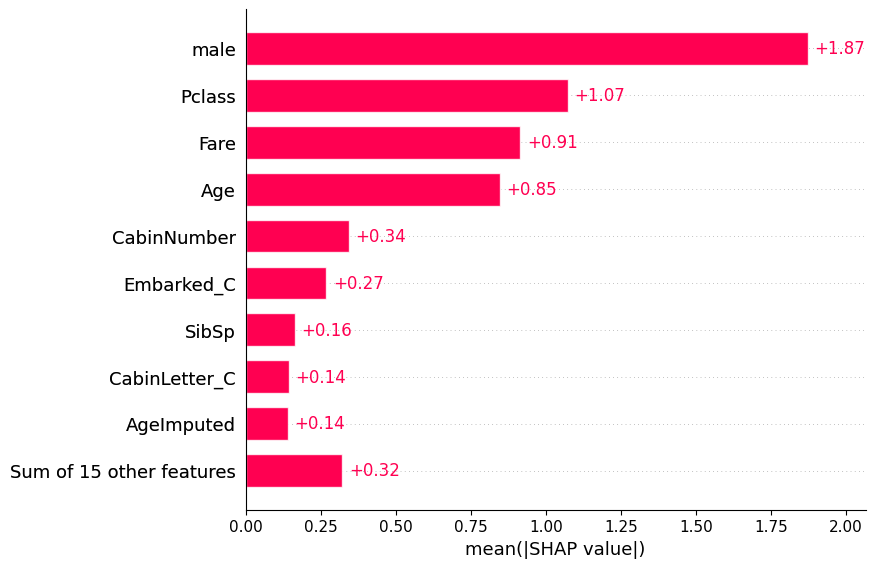

In [159]:
shap.plots.bar(shap_values)

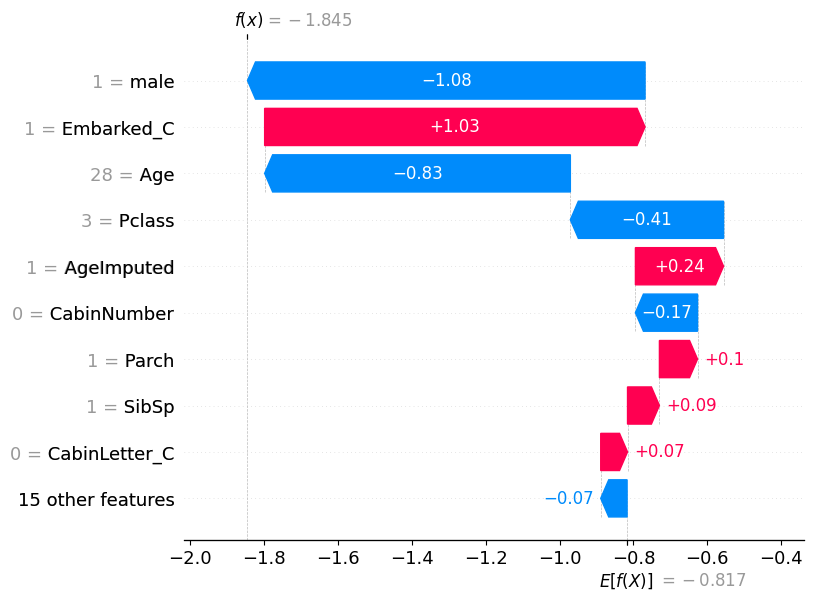

In [104]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [140]:
X_test[['male', 'Embarked_C', 'Age', 'Pclass']]

,male,Embarked_C,Age,Pclass
709,1.0,1.0,28.0,3.0
439,1.0,0.0,31.0,2.0
840,1.0,0.0,20.0,3.0
720,0.0,0.0,6.0,2.0
39,0.0,1.0,14.0,3.0
...,...,...,...,...
880,0.0,0.0,25.0,2.0
425,1.0,0.0,28.0,3.0
101,1.0,0.0,28.0,3.0
199,0.0,0.0,24.0,2.0


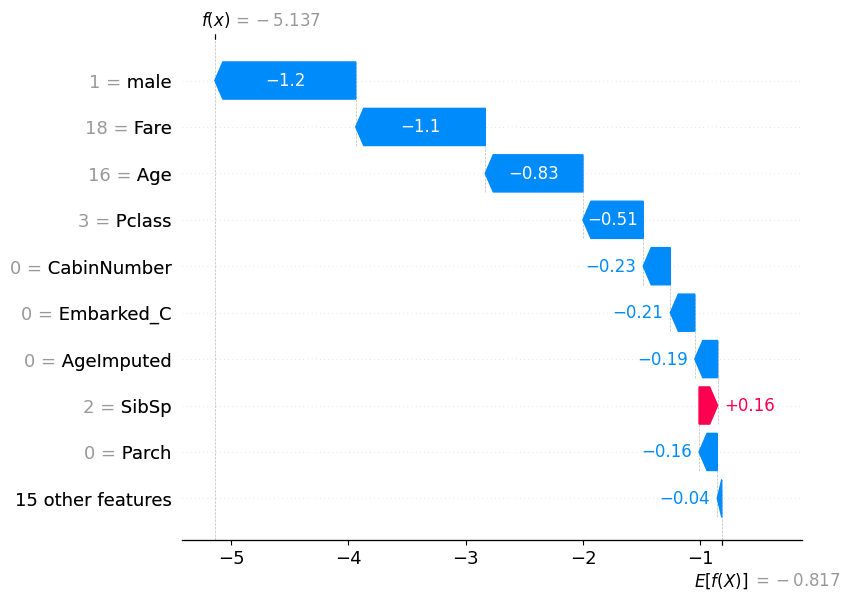

In [105]:
# visualize another prediction's explanation
shap.plots.waterfall(shap_values[7])

#### Find examples with high or low probabilities

In [128]:
highest_prob = pd.Series(y_pred_test).sort_values(ascending=False).head(1)
highest_prob

69    1
dtype: int32

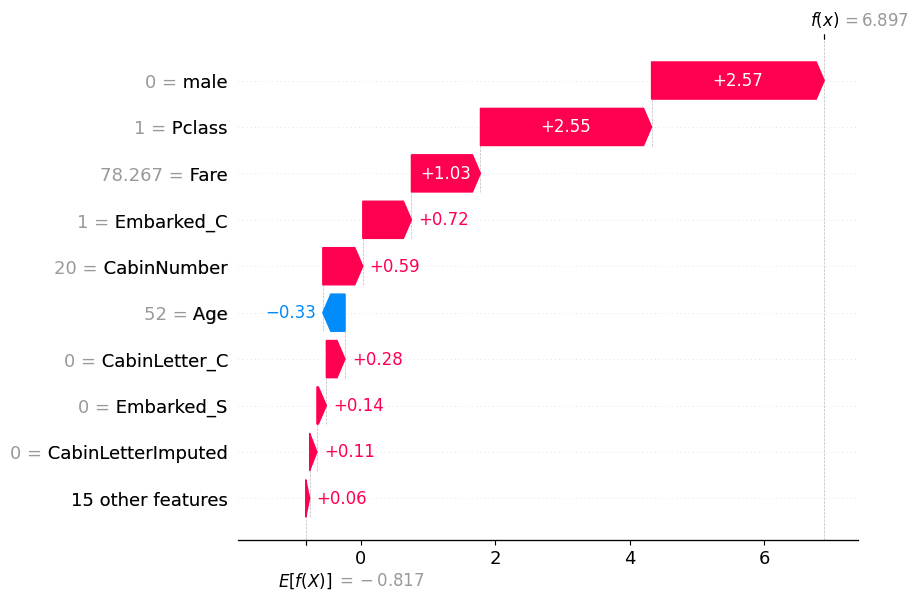

In [136]:
high_prob_index = highest_prob.index[0]
shap.plots.waterfall(shap_values[high_prob_index])

In [134]:
low_prob = pd.Series(y_pred_test).sort_values(ascending=False).tail(1)
low_prob

222    0
dtype: int32

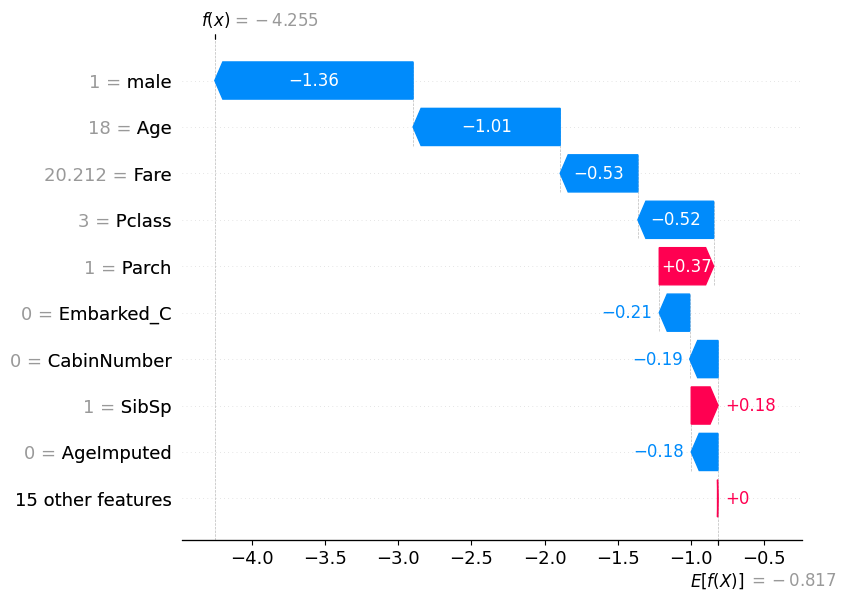

In [135]:
low_prob_index = low_prob.index[0]
shap.plots.waterfall(shap_values[low_prob_index])

## Force plots

In [145]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [155]:
# visualize all the predictions
shap.plots.force(shap_values)

## Dependence Plots

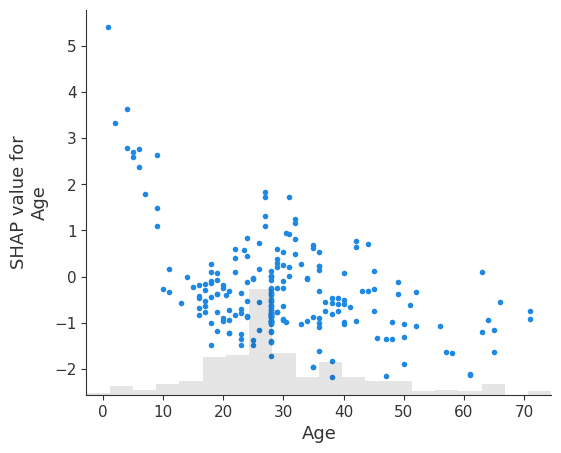

In [141]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"])

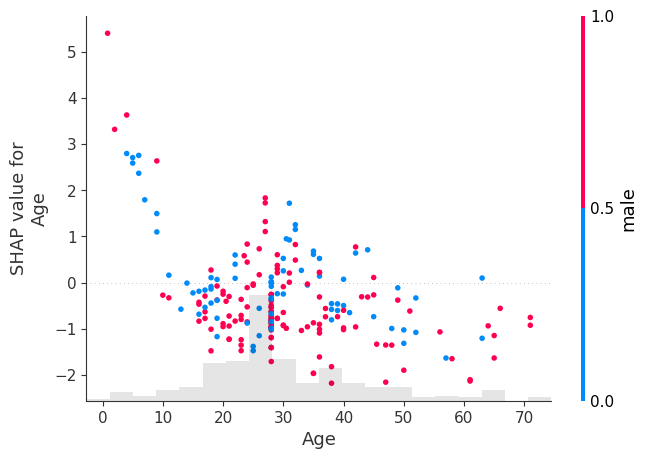

In [142]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "male"])

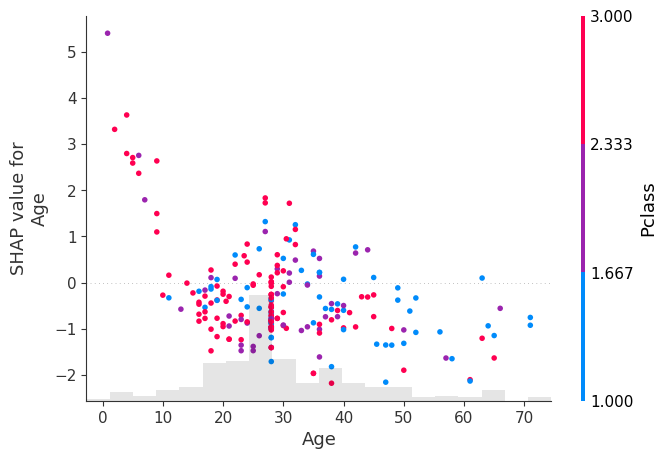

In [143]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Pclass"])

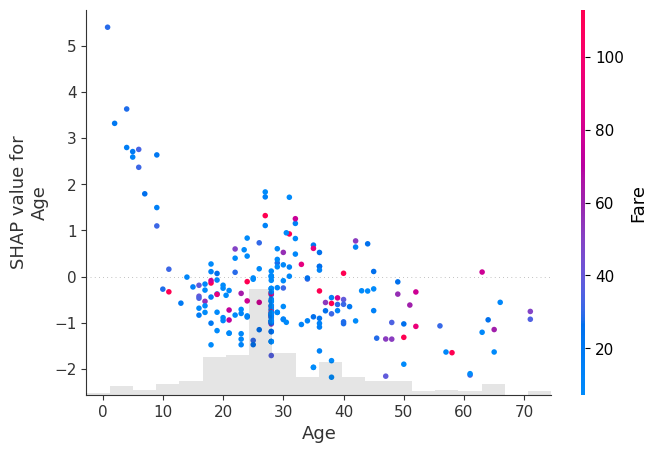

In [144]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Fare"])

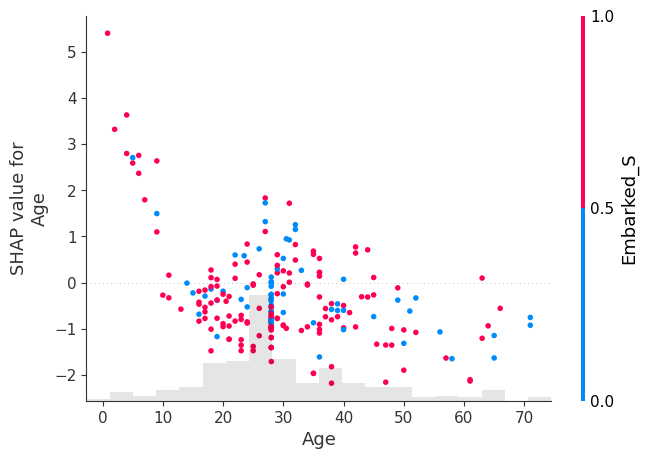

In [108]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

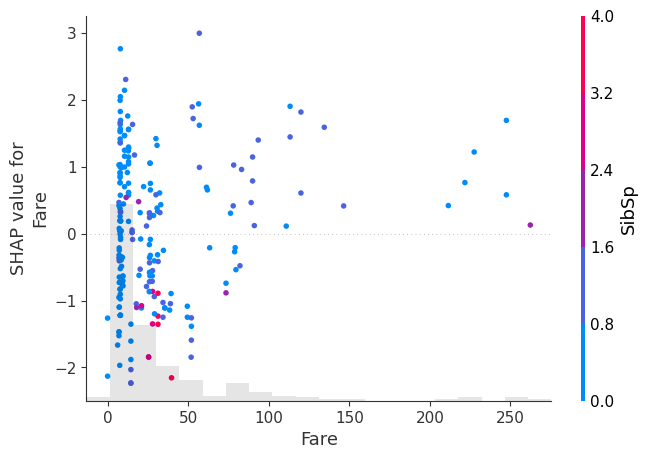

In [109]:
shap.plots.scatter(shap_values[:, "Fare"], color=shap_values)

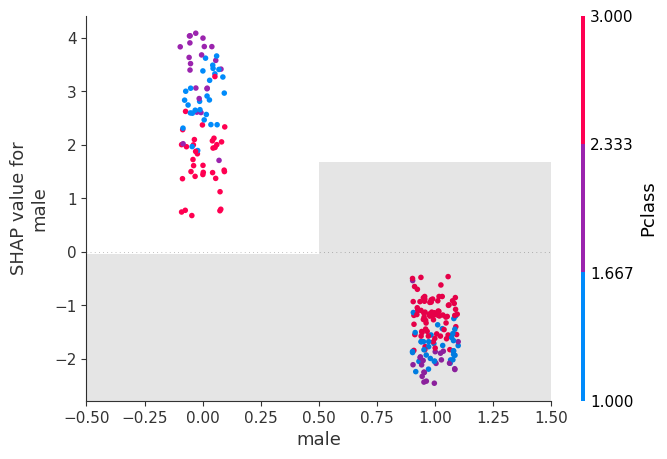

In [110]:
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

## Beeswarm

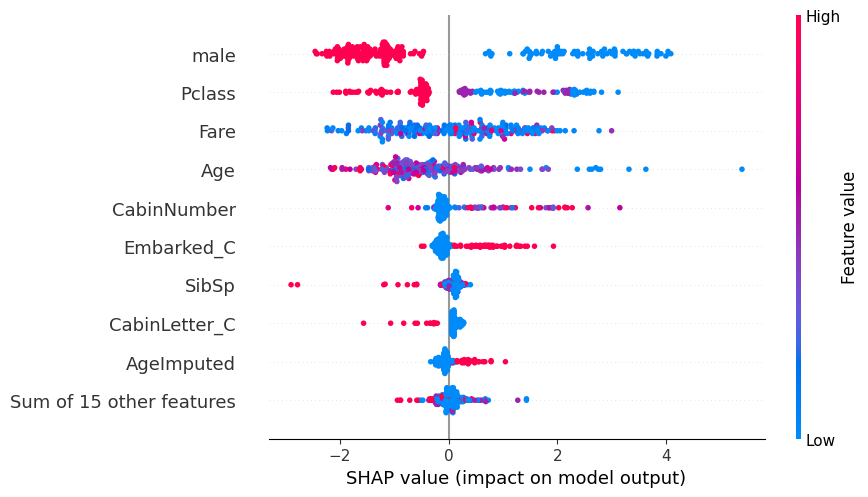

In [111]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## Violin

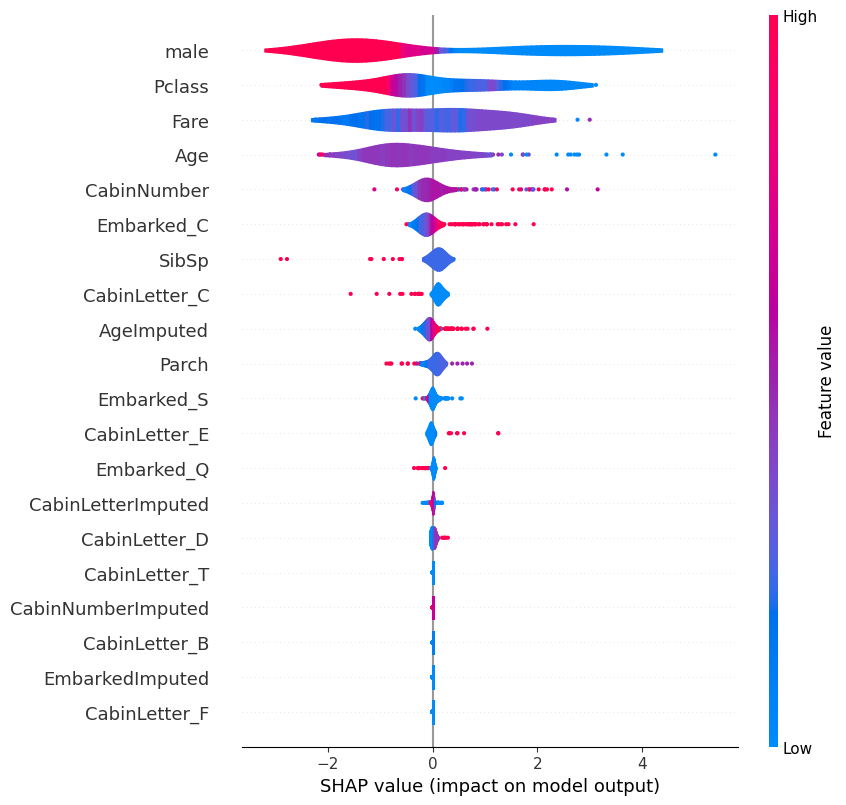

In [112]:
# summarize the effects of all the features
shap.plots.violin(shap_values)

### Bar: Cohorts

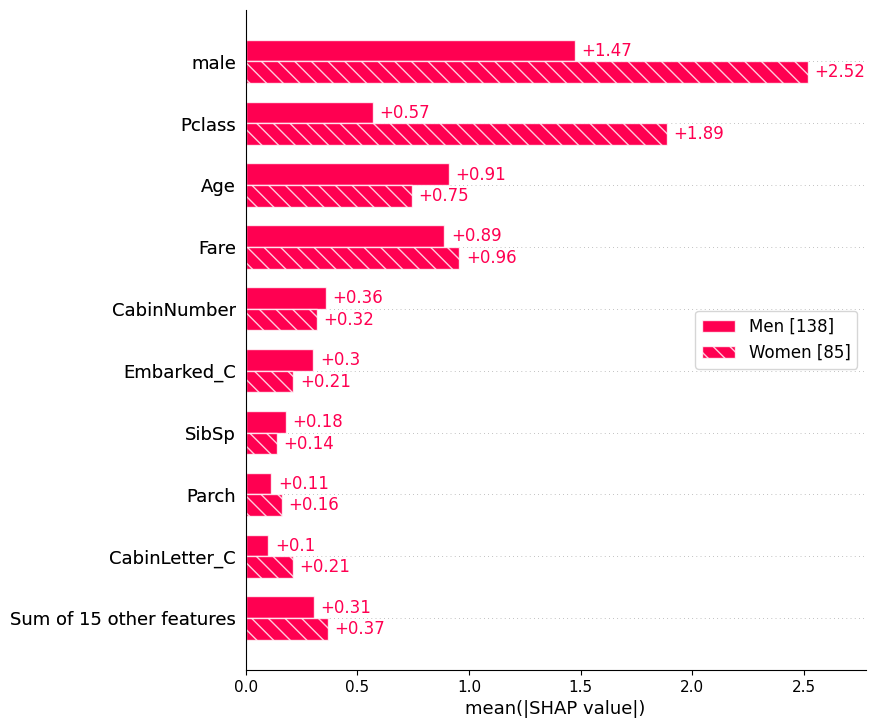

In [114]:
sex = ["Women" if shap_values[i, "male"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

Plot the bars for an individual.

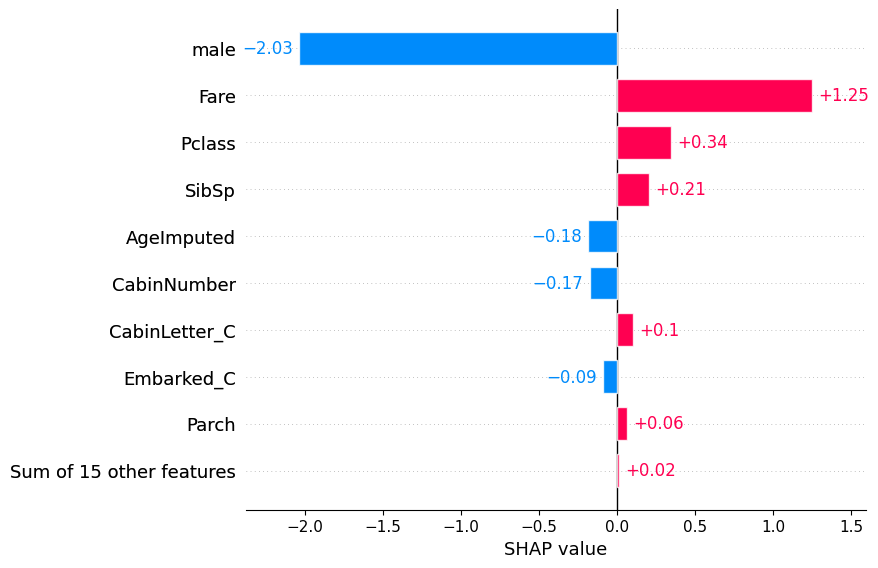

In [115]:
shap.plots.bar(shap_values[1])

# Decision

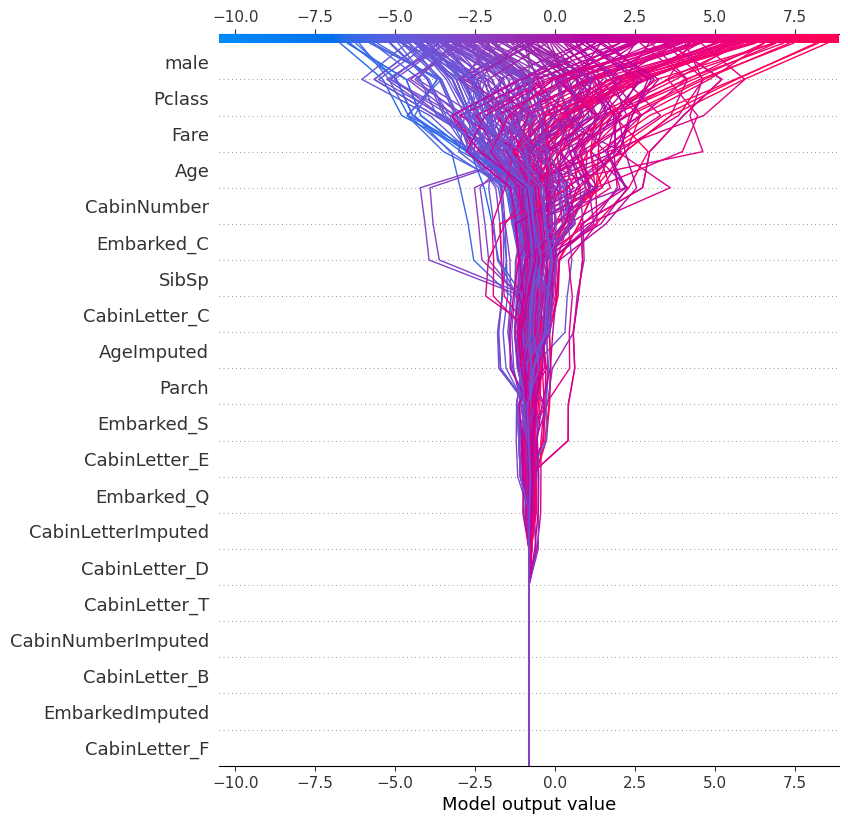

In [147]:
shap.plots.decision(
    explainer.expected_value,
    shap_values.values,
    feature_names=X.columns.tolist()
    )

### Decision plot for individual

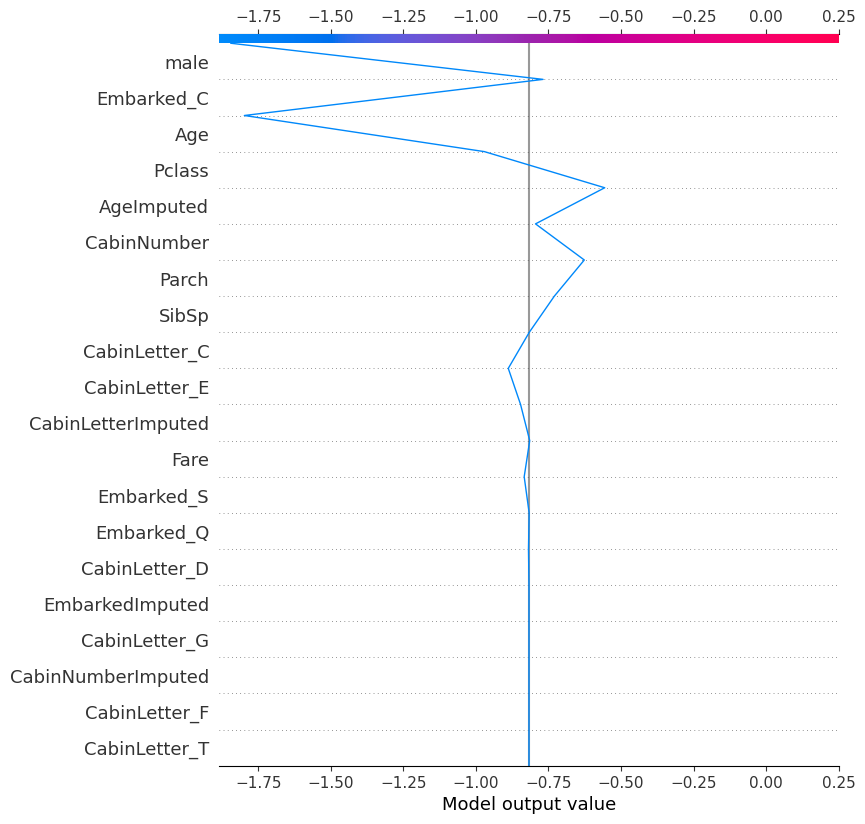

In [117]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X_test)[0], # one way of specifying the record to look at
    feature_names=X.columns.tolist()
    )

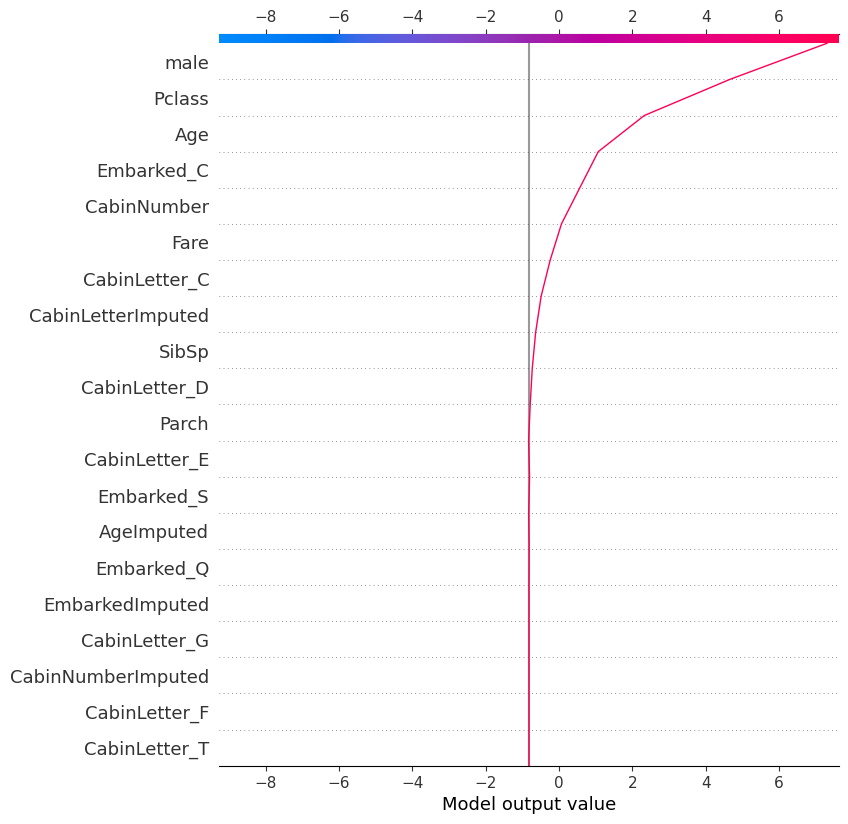

In [146]:
shap.plots.decision(
    explainer.expected_value,
    shap_values.values[121], # another way of specifying the record to look at
    feature_names=X.columns.tolist()
    )

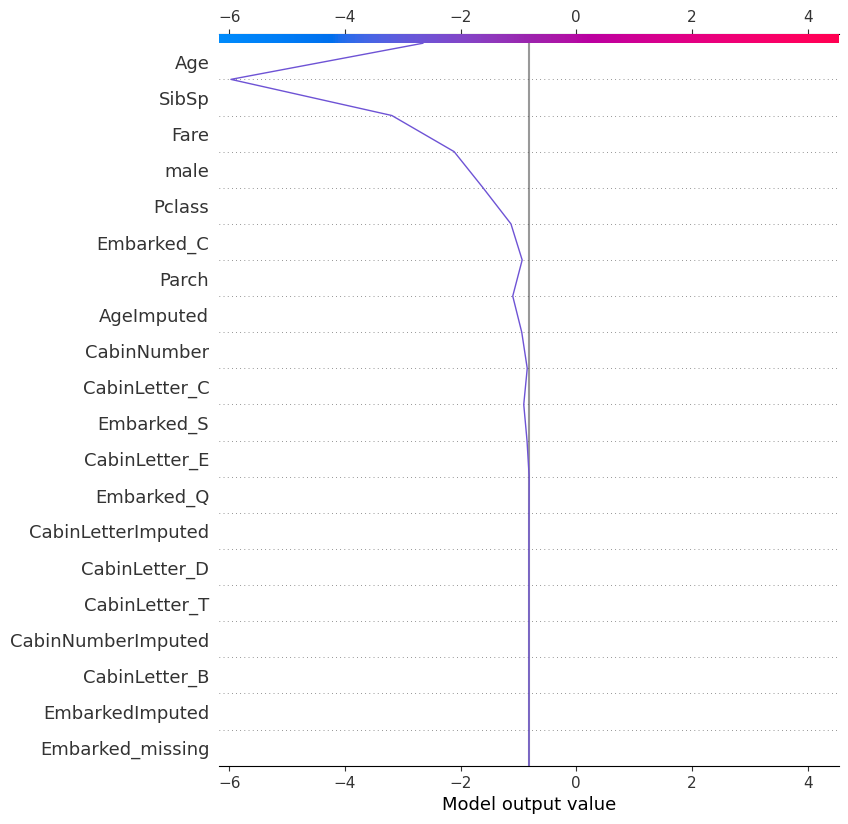

In [119]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X_test)[215],
    feature_names=X.columns.tolist()
    )

## SHAP: Probability Alternative

Recalculate the SHAP values as changes in probability instead of log odds.

In [120]:
# explain the model's predictions using SHAP
explainer_probability = shap.Explainer(model, X_train, model_output="probability")
shap_values_probability = explainer_probability(X_test)

shap_values_probability

.values =
array([[-0.05238777, -0.13358663,  0.01009056, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0511844 , -0.03143588,  0.0286387 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05579166, -0.05355721, -0.00460973, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.0458467 , -0.10278892,  0.01064102, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14912559, -0.06840275,  0.00767626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04991312, -0.10697621,  0.00952425, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([0.38372332, 0.38372332, 0.38372332, 0.38372332, 0.38372332,
       0.38372332, 0.38372332, 0.38372332, 0.38372332, 0.38372332,
       0.38372332, 0.38372332, 0.38372332, 0.38372332, 0.38372332,
       0.38372332, 0.38372332, 0.38372332, 0.38372332, 0.38372332,
       0.38372332, 0.38372332, 0.38372332, 0.38372332, 0.38372332,
       0.38372332, 0.38372

### Beeswarm Plot: Probability

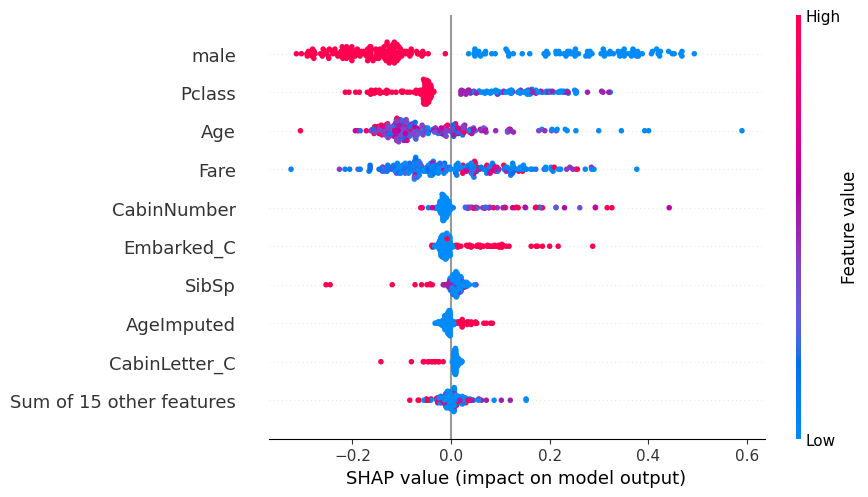

In [121]:
shap.plots.beeswarm(shap_values_probability)

#### Comparison with log odds plot

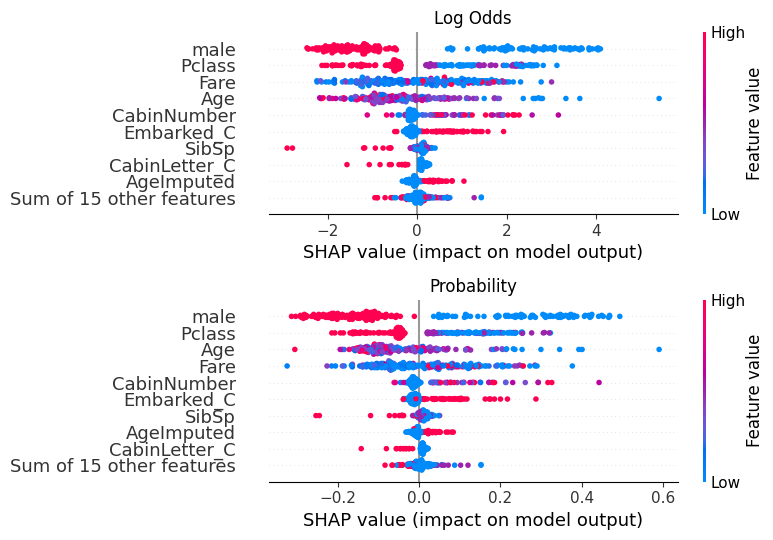

In [122]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

plt.sca(ax1) ## NEW
shap.plots.beeswarm(shap_values, show=False)
plt.title("Log Odds")

# Change to the second axis
plt.sca(ax2) ## NEW
shap.plots.beeswarm(shap_values_probability, show=False)
plt.title("Probability")
plt.tight_layout()
plt.show()

### Waterfall Plot: Probability

If we pull out the predicted probability for this passenger, we can see that the predicted probability of class 0 (died) is 0.69, while the predicted probability of survival (class 1) is 0.301. 

In [169]:
pd.DataFrame(model.predict_proba(X_test)).reset_index(drop=True).iloc[56]

0    0.69867
1    0.30133
Name: 56, dtype: float32

This matches what is now shown in the waterfall plot.

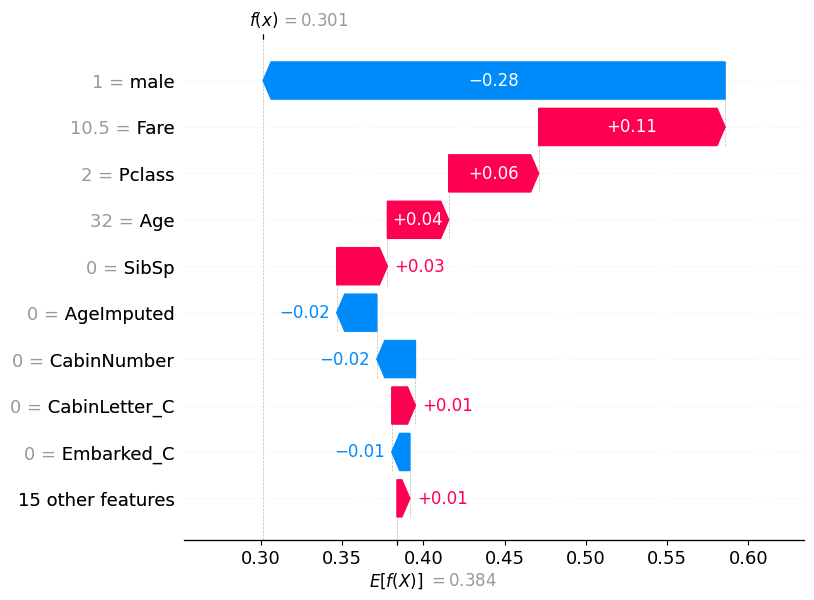

In [162]:
shap.plots.waterfall(shap_values_probability[56])

In [172]:
pd.DataFrame(model.predict_proba(X_test)).reset_index(drop=True).iloc[115]

0    0.97308
1    0.02692
Name: 115, dtype: float32

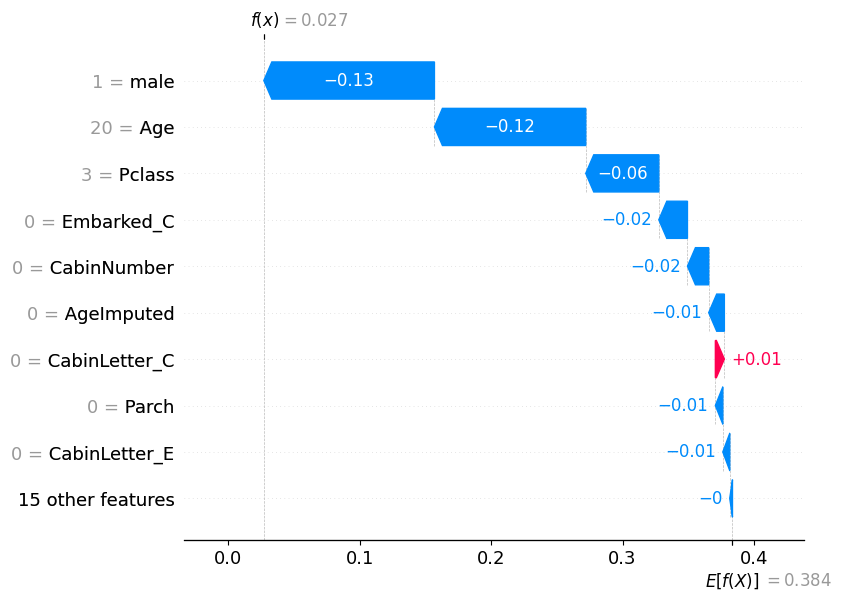

In [174]:
shap.plots.waterfall(shap_values_probability[115])

In [177]:
pd.DataFrame(model.predict_proba(X_test)).reset_index(drop=True).iloc[195]

0    0.000583
1    0.999417
Name: 195, dtype: float32

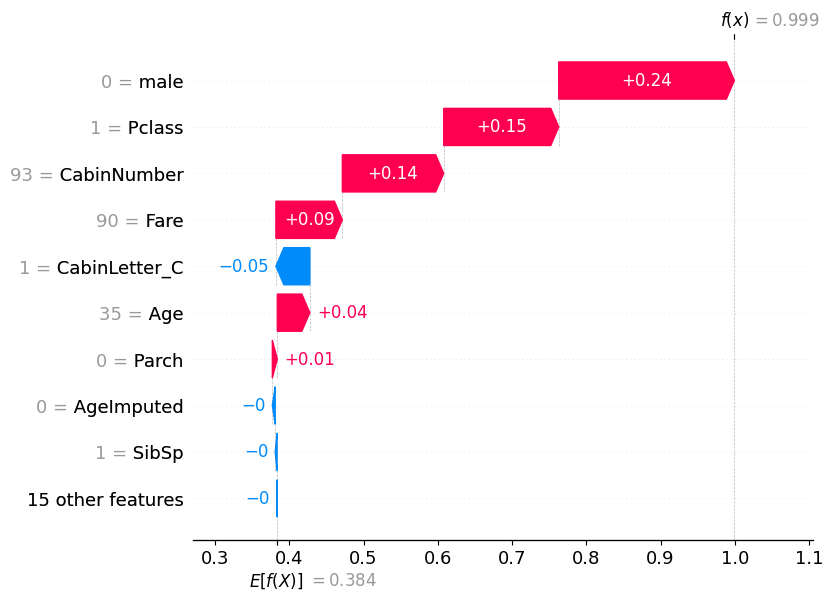

In [178]:
shap.plots.waterfall(shap_values_probability[195])

#### Comparison with log odds plot

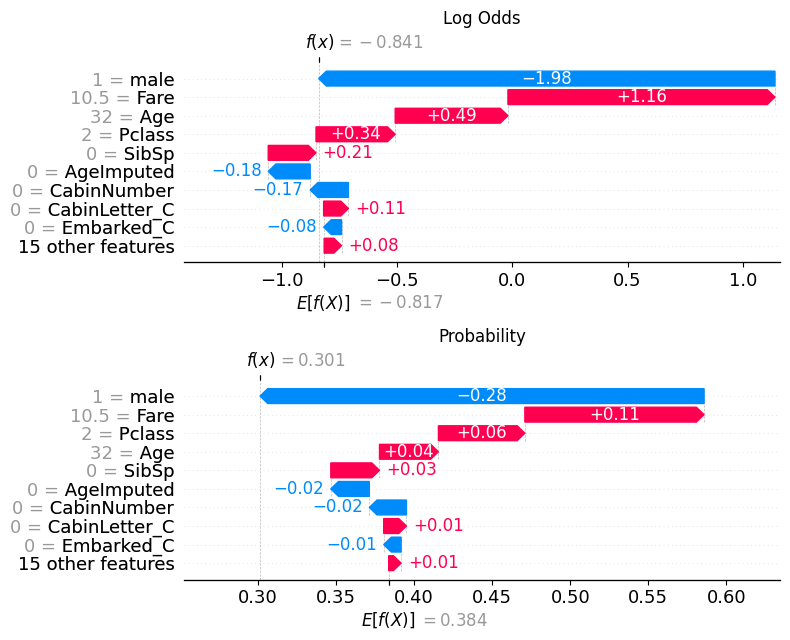

In [124]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

plt.sca(ax1) ## NEW
shap.plots.waterfall(shap_values[56], show=False)
plt.title("Log Odds")
# Change to the second axis
plt.sca(ax2) ## NEW
shap.plots.waterfall(shap_values_probability[56], show=False)
plt.title("Probability")
plt.tight_layout()
plt.show()